# Adatbányászat gyakorlat 3.
***
Időpont: péntek, 8\:30–10\:00 és 10\:15–11\:45<br/>
Helyszín: 3-107 / 3-111<br/>
Elérhetőségek: TEAMS chat, csoport

## Követelmények
***
### Röpzh
Minden óra végén fel lesz adva néhány egyszerű, lényegretörő kérdés az adott óra anyagából.

#### Értékelés
Minden feladat **1 pontot** ér a végső elszámolásban. Röpzh-kból összesen **10 pont** szerezhető majd.

### Házi feladat
A házi feladatok elkészítésére mindig **3 hetetek** lesz, beküldés után pedig még van lehetőség javítani a visszaküldött feladatokon. Az első változatot azonban a feladástól számított **két héten belül** várjuk, javítani csak ekkor lehet a visszaküldött feladatokon. <br/>
A notebookoknak hozzatok létre egy saját Google Drive mappát, és állítsátok be, hogy ezt a megosztó link birtokában bárki megtekinthesse. A notebookhoz tartozó linket és a html fájlt az óra Teams csoportjába kell majd feltölteni.

#### Értékelés
Az összesen 6 db házi feladatból **4 db hibátlan visszaküldése feltétele az elégséges jegynek**. Minden további visszaküldött házi feladat feladatonként **1-1 pontot** ad a végső elszámoláshoz.

### Projektmunka
A félév második felében két-háromfős csoportokban adatbányászati feladatokat fogtok megoldani. Erről a félév végén le kell adni egy legalább ötoldalas **dokumentációt**, valamint az utolsó héten **prezentálnotok** kell 7-10 percben az eredményeket. A 8. héten lesz egy bevezető pár perces előadásotok, ahol a bemutatjátok az adathalmazt, megfogalmazzátok a hipotéziseitek.

#### Értékelés
A projektmunkát az elvégzett munka, a leadott dokumentáció és a prezentáció minősége alapján értékelni fogjuk. A szerezhető összpontszám **30 pont**. A pozitív eredmény (hipotézis beigazolása, jó teljesítmény elérése) **nem** feltétele a jó jegynek. Az egész csapat ugyanazt az értékelést kapja, kivéve, ha ezt külön kéritek.

### Összpontszám:
Összesen tehát **40 pont** szerezhető. A jegyek a következőképp alakulnak majd:
- Ha legalább 4 házi feladat el lett fogadva, akkor:
  - 20 pont alatt: elégtelen
  - 20-24 pont: elégséges
  - 25-29 pont: közepes
  - 30-34 pont: jó
  - 35 pont felett: kiváló
- Ha 4-nél kevesebb házi feladatot küldtetek be, akkor a végső jegy elégtelen.

In [ ]:
def whats_my_final_grade(projekt_pontszam, ropz_pontszam, elvegzett_hazifeladatok):
  if elvegzett_hazifeladatok < 4:
    return 1
  else:
    pontszam = projekt_pontszam + ropzh + (elvegzett_hazifeladatok - 4)
    jegy = (pontszam - 15) // 5 + 1
    jegy = max([ min(jegy,5), 1 ])
    return jegy

projektmunka = 30 # (pont)
ropzh = 10 # (pont)
hazifeladatok = 6 # (db)

print("Végső jegy: ", whats_my_final_grade(projektmunka, ropzh, hazifeladatok))

Végső jegy:  5


# Adatbeolvasás

In [ ]:
import pandas as pd
pd.__version__

'1.4.4'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/titanic.csv")

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.500,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.000,C128,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.150,NaN,Q
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.275,NaN,S


Ha nem sikerült:

(Megjegyzés: a `ctrl + /` paranccsal rögtön lehet a kommentelést megszüntetni.)

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# # Then move kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d yasserh/titanic-dataset
# !unzip titanic-dataset.zip

# 3. gyakorlat: Adatelőkészítés, -feldologzás

Kategorikus változók: https://en.wikipedia.org/wiki/Categorical_variable

Scikit-learn, preprocessing: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Towards Data Science: https://towardsdatascience.com/categorical-feature-encoding-547707acf4e5#1056

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info() # az Age, Cabin és Embarked oszlopok hiányosak

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   ParCh        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Adat kódolás (Encoding)

[XKCD, 221](https://www.explainxkcd.com/wiki/index.php/221:_Random_Number): Random Number

A modellek többsége numerikus adatokat tud csak befogadni. A nem-numerikus változók elkódolása (numerikus értékké alakítása) ezért szükséges feladat.

## Numerikus változók

- Binning: folytonos eloszlás diszkrétté tétele
- Binary: egy küszöbértékhez viszonyított érték alapján

### Binning

Folytonos változót *vödrökbe* rakjuk. Hívják ezért *grouping*nek és *bucketing*nek is.

Google search: *apply a function to a pandas column*

In [ ]:
df["Age"].value_counts(bins=5)

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.339, 16.336]     100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [ ]:
df["Age"].value_counts(bins=12).sort_values() #Ezt csak saját magamnak próbálom ki. Ilyenkor a számlált éretékek szerint rendezi sorba, nem a "vödrök" szerint

(73.368, 80.0]        2
(66.737, 73.368]      5
(60.105, 66.737]     15
(7.052, 13.683]      21
(53.473, 60.105]     28
(46.842, 53.473]     48
(0.339, 7.052]       50
(40.21, 46.842]      52
(33.578, 40.21]     101
(13.683, 20.315]    108
(20.315, 26.947]    140
(26.947, 33.578]    144
Name: Age, dtype: int64

Mi van, ha saját *vödröket* szeretnénk?

In [ ]:
def Age2AgeGroup(age: int):
  if age < 2:
    return "baby"
  if 2 <= age<18:
    return "children"
  if 18 <= age < 30:
    return "youth"
  if 30 <= age < 50:
    return "adult"
  if 50 <= age:
    return "old"
  return None

In [ ]:
df["Age"].apply(Age2AgeGroup) # folytonos eloszlású változókat tömbösíthetjük (bucketing), diszkrét eloszlást csinálva belőlük

0      youth
1      adult
2      youth
3      adult
4      adult
       ...  
886    youth
887    youth
888     None
889    youth
890    adult
Name: Age, Length: 891, dtype: object

In [ ]:
df["AgeGroup"] = df["Age"].apply(Age2AgeGroup) # és a táblához is illeszthetjük

In [ ]:
df["AgeGroup"].value_counts()

youth       271
adult       256
children     99
old          74
baby         14
Name: AgeGroup, dtype: int64

<Axes: ylabel='AgeGroup'>

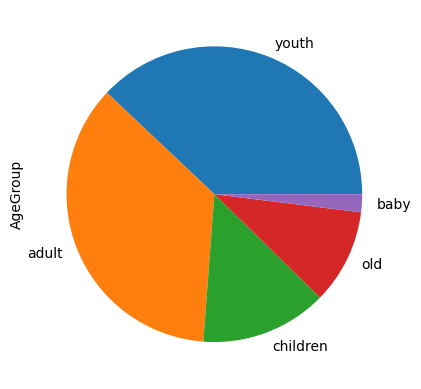

In [ ]:
df["AgeGroup"].value_counts().plot.pie() # ábrázoljuk

Szép megoldás:

- Sorrend: *pandas value counts order* / *pandas dataframe row order*
- Színskála: *matplotlib sequential colors* (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
df["AgeGroup"].value_counts().reindex(["baby","children","youth","adult","old"])

baby         14
children     99
youth       271
adult       256
old          74
Name: AgeGroup, dtype: int64

<Axes: ylabel='AgeGroup'>

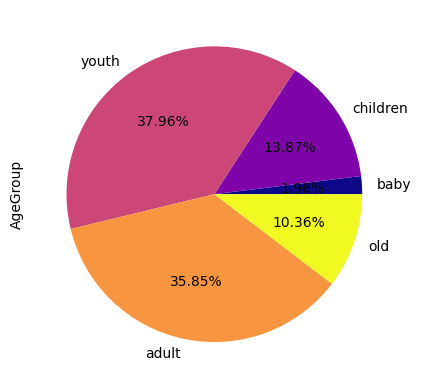

In [ ]:
values = df["AgeGroup"].value_counts().reindex(["baby","children","youth","adult","old"])
values.plot.pie(autopct='%.2f%%', cmap="plasma") # megfelelő sorrendben

### Binary encoding

Ha egy folytonos, numerikus változót egy adott küszöbértékhez szeretnénk viszonyítani.

In [ ]:
threshold = df["Fare"].mean()
threshold

32.204207968574636

In [ ]:
df["FareCheap"] =  (df["Fare"] < threshold).astype("int")

In [ ]:
df.groupby("Pclass")["FareCheap"].value_counts(normalize=True).unstack()

FareCheap,0,1
Pclass,,
1,0.736111,0.263889
2,0.119565,0.880435
3,0.061100,0.938900


<Axes: xlabel='Pclass'>

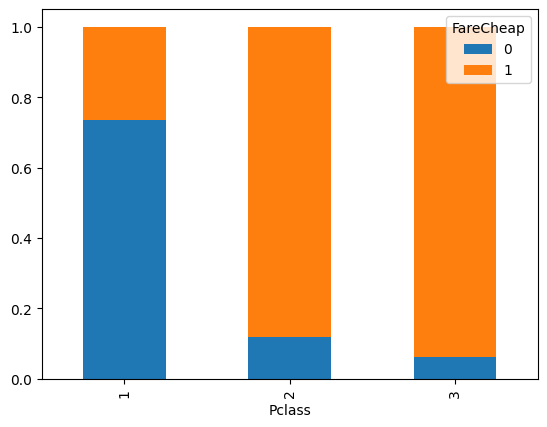

In [ ]:
values = df.groupby("Pclass")["FareCheap"].value_counts(normalize=True).unstack()
values.plot.bar(stacked=True)

Szép megoldás

- Vízszintes: *maptlotlib horizontal barplot*
- Szín: *matplotlib colors* (https://matplotlib.org/stable/gallery/color/named_colors.html)
- Értékek (autopct hibát ad!): *pandas bar plot show values* (https://stackoverflow.com/questions/43544694/using-pandas-crosstab-to-create-a-bar-plot)
- Értékek formázása:
  - matplotlib API: *bar label* (https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#bar-label-demo)
  - *python %-format strings*

In [ ]:
pd.crosstab(df["Pclass"],df["FareCheap"], normalize="index")

FareCheap,0,1
Pclass,,
1,0.736111,0.263889
2,0.119565,0.880435
3,0.061100,0.938900


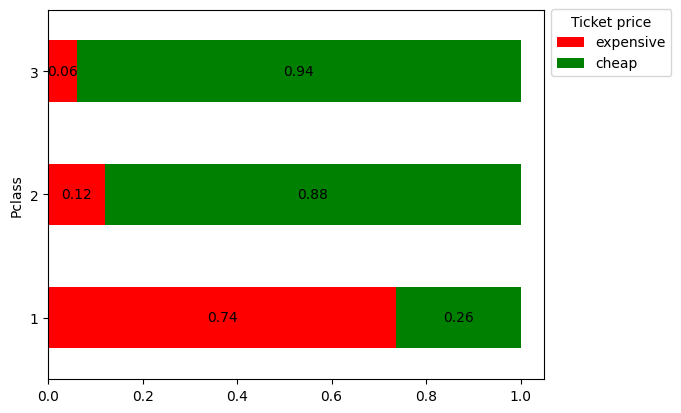

In [ ]:
values = pd.crosstab(df["Pclass"],df["FareCheap"], normalize="index")
ax = values.plot.barh(stacked=True, color=["r","g"]) # pandas horizontal bar plot

ax.legend(title='Ticket price',
          labels=["expensive","cheap"],
          bbox_to_anchor=(1, 1.02),
          loc='upper left')

for container in ax.containers:
  ax.bar_label(container, label_type="center", fmt='%.2f') # nézd meg fmt='%.2f%%'-vel

## Kategorikus változók

### One hot encoding

Dummy kódolásnak is nevezik. Nézzük az `Embarked` oszlopot! Három lehetséges értéke az `S,C,Q`. Vegyünk 3 indikátor változót, nevezzük őket `Embarked_S, Embarked_C, Embarked_Q`-nak. A szabály a következő: ha `X` városban szállt be valaki, akkor `Embarked_X` értéke legyen 1, a többié 0. Tehát például, ha valaki Southamptonban szállt fel, akkor `Embarked_S=1, Embarked_C=0, Embarked_Q=0`. Ezen indikátor változókat nevezzük dummy változóknak, a belőlük képzett vektort pedig dummy vektornak. Ez előző esetben például a dummy vektor a következő lenne: $[1,0,0]$. Az egyes oszlopok ekkor arra a kérdésre válaszolnak valójában, hogy az illető `X` városban szállt-e fel.

In [ ]:
df["Embarked"].unique() #Ezzel konkrétan azt kérdezem meg, hogy az "Embarked" oszlopban milyen értékek szerepelhetnek

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
(df["Embarked"] == "S").astype("int") #Eredetileg úgy volt, hogy astype("int"), de én kipróbáltam, hogy mi van, ha logikai értékkel kérdezek rá

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: Embarked, Length: 891, dtype: int64

In [ ]:
for city in df["Embarked"].unique():
  if pd.notna(city): # nézd meg mi történik, ha ezt a feltételt kihagyod
    df[f"is_Embarked_{city}"] = (df["Embarked"] == city).astype("int") #Itt az történik, hogy az is_Embarked_ szöveg mögé a city változó strinesített verziója kerül

In [ ]:
list( filter(lambda col: "Embarked" in col, df.columns) )

['Embarked', 'is_Embarked_S', 'is_Embarked_C', 'is_Embarked_Q']

In [ ]:
df[ ['Embarked', 'is_Embarked_S','is_Embarked_C','is_Embarked_Q'] ] #Itt egyszerűen csak kikérjük az oszlopokat, amikbe beírtuk az új értékeket, meg persze a sima Embarked-ot is

,Embarked,is_Embarked_S,is_Embarked_C,is_Embarked_Q
0,S,1,0,0
1,C,0,1,0
2,S,1,0,0
3,S,1,0,0
4,S,1,0,0
...,...,...,...,...
886,S,1,0,0
887,S,1,0,0
888,S,1,0,0
889,C,0,1,0


Mindenhol egy db 1-es van?

In [ ]:
df[ ['is_Embarked_S','is_Embarked_C','is_Embarked_Q'] ].sum(axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Length: 891, dtype: int64

In [ ]:
all( df[ ['is_Embarked_S','is_Embarked_C','is_Embarked_Q'] ].sum(axis=1) == 1 )

False

Ellenőrzés

In [ ]:
df[ ['is_Embarked_S','is_Embarked_C','is_Embarked_Q'] ].sum()

is_Embarked_S    644
is_Embarked_C    168
is_Embarked_Q     77
dtype: int64

In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Vegyük észre, hogy az utolsó oszlopot akár el is lehet hagyni: `Embarked_Q` pontosan akkor 1, ha a többi 0. (Hiszen az első $n-1$ indikátor változó meghatározza az $n$-diket, ha a rendszer teljes.)

### Label encoding

Ha egy $n$ különböző értéket felvevő kategorikus változó értékeit 0-tól $n-1$-ig terjedő skálán reprezentáljuk

In [ ]:
embark2int = {"S": 0, "C": 1, "Q": 2}

In [ ]:
#df["Embarked"].apply(embark2int) #Ez így nem működik, felesleges minden egyes alkalommal lefuttatni

Keresés: *apply dictionary to a pandas column*

Megoldás: https://www.geeksforgeeks.org/using-dictionary-to-remap-values-in-pandas-dataframe-columns/
- map: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html?highlight=map#pandas.Series.map
- replace: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace

In [ ]:
df["Embarked"].map(embark2int)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [ ]:
df["Embarked"].map(embark2int).value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [ ]:
df.replace({"Embarked": embark2int})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,FareCheap,is_Embarked_S,is_Embarked_C,is_Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,youth,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,adult,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,youth,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,adult,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,adult,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0,youth,1,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0,youth,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0.0,None,1,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0,youth,1,0,1,0


Alternatív keresés:
- Az API *See also* része: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply


Megjegyzés: ha az ember otthonosan mozog a lambda függvények használatában, akkor az alábbi is egy jó megoldás:

In [ ]:
df["Embarked"].apply(lambda city: embark2int.get(city)) # Ez ugyanaz a fajta get() mint Javaban és C++-ban: most jelen esetben egy szótárból minden egyes hívásnál lekérünk egy adott kulcshoz tartozó értéket, és így kódoljuk el a városokat számokká

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

**Vigyázz!**
Egy kategorikus változó numerikussá tétele után a df.corr() hívásban már ez a változó is szerepelni. Ez attól még **nem** jelenti azt, hogy az eredmény értelmes! Gondold csak végig! Ha egy kategorikus változó erősen korrelál (a szó köznapi értelmében) egy másikkal, akkor különböző leképezések során különböző értéket fogsz kapni! Erre mindig figyelj vizsgálódás során.

In [ ]:
for i in range(3):
  embark2int = {"S": i%3, "C": (i+1)%3, "Q": (i+2)%3}
  c = df["Embarked"].map(embark2int).corr(df["Fare"])
  print(embark2int,c, sep='\n', end='\n\n')

{'S': 0, 'C': 1, 'Q': 2}
0.06346234476922943

{'S': 1, 'C': 2, 'Q': 0}
0.2695875522775061

{'S': 2, 'C': 0, 'Q': 1}
-0.2263111836962685



# Skálázás (Scaling)

Néha a numerikus értékeket szeretnénk átskálázni is (ha pl. a konkrét érték helyett az egymáshoz viszonyított érték számít).

## Standarizálás

Ha adott egy $N(m,\sigma)$ normális eloszlású változó, érdemes standard normálissá transzformálni.

<Axes: >

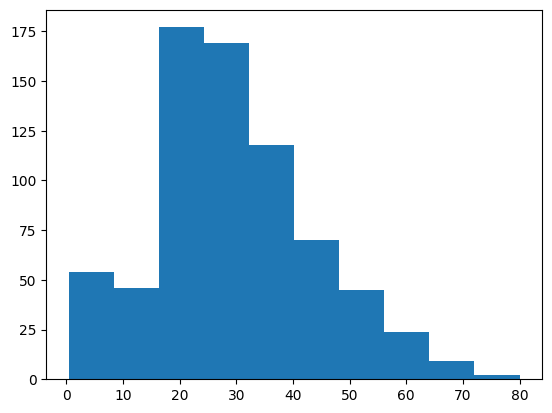

In [ ]:
df["Age"].hist(grid=False)

In [ ]:
m, std = df["Age"].agg(["mean","std"]) #m lesz az átlag (várható érték), std pedig a szórás
print(m,std)

29.69911764705882 14.526497332334042


In [ ]:
df["NormAge"] = (df["Age"] - m) / std #Itt normalizáljuk

<Axes: >

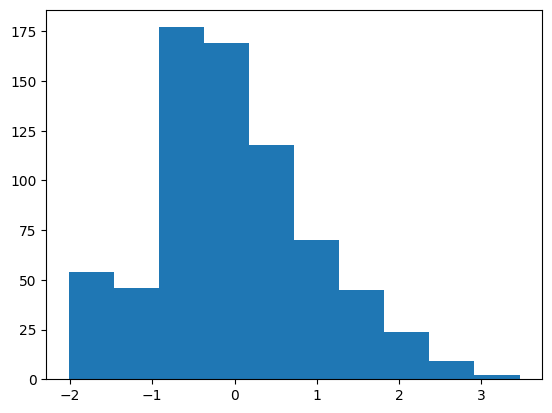

In [ ]:
df["NormAge"].hist(grid=False) #Így már körülbelül standard normális

In [ ]:
df["NormAge"].agg(["mean","std"]) #Láthatjuk, hogy nagyjából tényleg 0 az átlag, és tényleg 1 a szórás

mean    2.338621e-16
std     1.000000e+00
Name: NormAge, dtype: float64

## StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stan = StandardScaler().fit(df[["Age"]])

In [ ]:
stan.mean_, stan.scale_

(array([29.69911765]), array([14.51632115]))

In [ ]:
stan.transform(df[["Age"]])

In [ ]:
pd.DataFrame.from_records(
     zip( stan.transform(df[["Age"]]).ravel(), df["NormAge"] ),
    columns = ["scaler","byhand"]
)

,scaler,byhand
0,-0.530377,-0.530005
1,0.571831,0.571430
2,-0.254825,-0.254646
3,0.365167,0.364911
4,0.365167,0.364911
...,...,...
886,-0.185937,-0.185807
887,-0.737041,-0.736524
888,NaN,NaN
889,-0.254825,-0.254646


# Feldolgozott adatok mentése

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareCheap',
       'is_Embarked_S', 'is_Embarked_C', 'is_Embarked_Q', 'NormAge'],
      dtype='object')

In [ ]:
df.to_csv("drive/MyDrive/titanic_preprocessed.csv", index=False)

# Gyakorlás

Kódolás

1. A `Sex` kategorikus változót kódold el numerikus értékké! Milyen kódolást használtál? Lehet-e mást?
1. Az `Age` oszlopot az átlag helyett kódold el a *medián* szerint binárisan! Nézd meg, hogy az utasosztályok szerint milyen eloszlást kapsz!
1. Az *ordinal encoding* során a transzformálni kívánt változónak van egy *természetes* sorrendje (pl. napok, hónapok). Ekkor a kódolás során ezt szeretnénk megtartani. Jelen esetben ilyen például az `AgeGroup` változó. Alakítsd át numerikus értékké a sorrend tiszteletben tartásával!
1. A *scikit-learn.preprocessing* modul nem csak a skálázásra, de az elkódolásra is tartalmaz beépített függvényt. A [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) segítségével ismételd meg az `Embarked` oszlop órán látott Label encoding változatát!

Skálázás
1. A *minmax* skálázás során egy változót a $[0,1]$-be képezünk a minimum és maximum értékei segítségével. A `Fare` oszlopot skálázd át eszerint! A legkisebb érték legyen 0, a legnagyobb 1! Megjegyzés: ha $X$ minimuma $m$, maximuma $M$, akkor $$\mathbf{X}_{minmax} = (\mathbf{X} - m) / (M-m).$$
Keresd meg, hogy a scikit-learn mely skálázója teszi ugyanezt és próbáld ki, hogy ugyanazt a transzformáltat kapod-e!


## További feladatok otthoni gyakorlásra
1. Készíts egy vezetéknév oszlopot és nézd nézd meg a leggyakoribb neveket! Használd a keresőt, ha nem tudod, milyen függvényt használj (pl "pandas most common values in column")! A vezetéknév kinyeréséhez figyeld meg, hogy mindenki vezetékneve vesszővel elválasztva szerepel a `string` elején. Ismered a megfelelő python parancsot erre? Ha nem, nézd meg, hogy mit csinál `.split(",")` parancs az oszlop egy tetszőleges elemén!
1. Kódold el az `Age` oszlopot a kvartilisek alapján! (Emlékeztető: egy kvartilisbe esik az adatok 20%-a, és az első kvartilisbe a *első* ötöd esik). Használd a `quantile` vagy `percentile` függvényeket! Milyen típusú kódolás ez? Mit gondolsz, milyen modellek esetén érdemes így elkódolni egy adatot, és mikor felesleges, sőt, hátrányos?
1. A *target encoding* során egy kategorikus változót aszerint kódolunk el, hogy a *célváltozónak mennyi az átlaga* a változó adott szintjén. Készítsd el az `Embarked` oszlop target encode-olt változatát! Mi ennek a kódolásnak a hátránya? Érdemes használni szerinted?


## Gyakorló feladatok az előző óráról
Adatmanipuláció

1. Készíts egy `FamilyMember` nevű `pd.Series`-t, mely a `SibSp` és `ParCh` oszlopok összegével egyezzen meg! Nézd meg a korrelációját a többi oszloppal! Mit gondolsz, érdemes lenne mind a három feature-t használni majd később egy modellezés során (vagyis a táblázathoz új oszlopként illeszteni)? Ábrázold az új változó eloszlását egy megfelelő diagramon!

Ha bármikor elakadsz: Tech Support Cheat Sheet ([XKCD, 627](https://xkcd.com/627/))


In [ ]:
#1.
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
sex2int = {"male": 0, "female": 1}

In [ ]:
df["Sex"].map(sex2int)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
#2.

m = df["Age"].median()
m

28.0

In [ ]:
df["Age_median"] =  (df["Age"] > m).astype("int")
df["Age_median"].value_counts() #Nagyon fasza

0    539
1    352
Name: Age_median, dtype: int64

In [ ]:
pd.crosstab(df["Pclass"],df["Age_median"], normalize="index") #Lehetséges magyarázat: az első osztályon utazók kisebb eséllyel vittek magukkal gyereket, mert vagy nem volt nekik, vagy terhes volt nekik ez az egész. És ott valószínűleg azért is több az idősebb (28 és feletti), mert addigra szerezték meg azt a vagyont, amiből ki tudtak fizetni egy első osztályú jegyet. Ezzel szemben a másod osztályon kiegyensúlyozottabb az eloszlás, a haramd osztályon pedig kifejezetten sok a 28 év alatti, mivel ott sok volt a feltörekvő, ambíciózus fiatal, akik valami hirtelen ötlettől vezérelve ki akartak vándorolni Amerikába

#Szóval a crosstab helyes szintaxisa a következő: pd.crosstab("Sorok", "oszlopok", esetleg normalizálás). A legvégső jóljöhet eloszlás kiolvasásánál

Age_median,0,1
Pclass,,
1,0.379630,0.620370
2,0.505435,0.494565
3,0.741344,0.258656


# Házi feladat

Beküldési határidő:

- Első változat: március 30. 23:59:59
- Utolsó változat: április 6. 23:59:59

Beküldési útmutató:

- Mikor végeztél, mindig futtasd le az újra a kódod, hogy biztos nem maradt-e benne hiba (olyan kódot, ami nem fut le, sajnos nem tudunk elfogadni). Ezt a következőképp [teheted meg](https://python.plainenglish.io/how-to-convert-google-colab-notebook-ipynb-to-html-ccfeda199246):
1. Runtime / Restart and run all: újraindítja a sessiont, ha nincs bug a kódban, rendben lefut a végéig.
2. A kimenetekkel együtt töltsd le a notebookot `.ipynb` formátumban a gépedre.
3. A keletkezett `.ipnyb` fájlt töltsd fel a Teams megfelelő feladatához!

### Feladat

Először alakítsd át a `Embarked` oszlopot úgy, hogy kiírod a városneveket! (Tehát S->"Southampton", stb). A kapott `pd.Series`-t illeszd a táblázathoz `EmbCity` néven! Hasonlóképp tedd ezt meg a `Pclass` oszloppal, ahol az 1 helyére "first"-öt írsz, stb.

Ezután vizsgáljuk azt a kérdést, hogy az adott városban felszálltak hány százaléka élte túl a katasztrófát, utasosztály szerint bontva. A kérdéshez az alábbi diagramot készítettük ([elérhető](https://drive.google.com/file/d/16emBrG_DpFQcxpz5W7Mu8nB5CBmuwd-y/view?usp=share_link) az óra Drive-mappájában is):



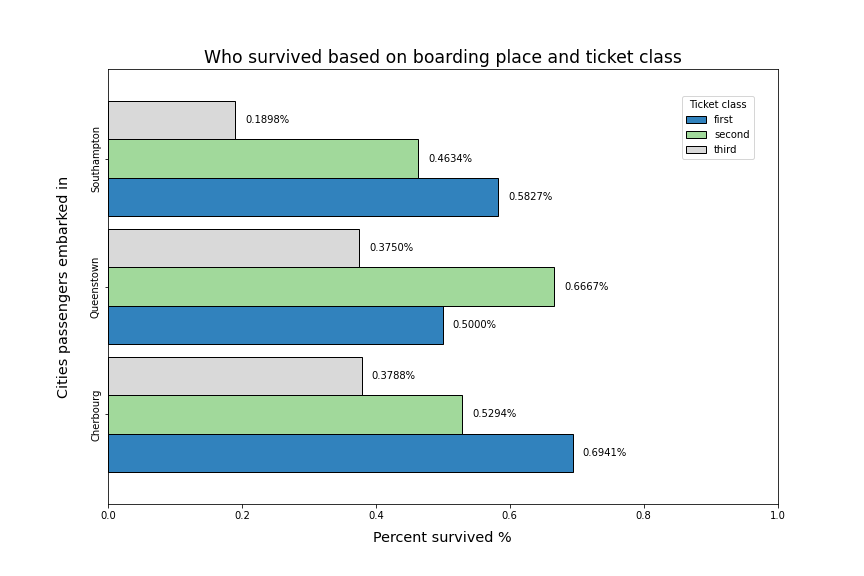

Rekonstruáld a fenti diagramot a lehető legpontosabban! A kapott ábrát a  
```
plt.savefig("drive/MyDrive/.../hf3_[NEVED].png")
```
paranccsal mentsd el és csatold a házi feladathoz.

### Pontozás

Az alábbi részek **kötelezőek** a házi feladat elfogadásához:


* Helyes diagram választása
* Az ábrázolt adatok helyessége
* Jelmagyarázat és annak neve, elhelyezkedése
* Tengelyek és címkék helyes elnevezése
* Diagram címe
* Vízszintes tengely 0 és 1 közé tétele
* Százalék kiírása a sávok mellé 4 tizedesjegy pontossággal (*bar labels*)
* Ezen érték (*bar label*) a sávon kívül helyezkedjen el
* Valamiféle (a példától akár különböző) színskála alkalmazása


Ezenkívül az alábbi dolgok lettek módosítva az ábra készítése során. Ezek közül minden további **2 helyes beépítése** plusz 0.2 pontot jelent (a teljes ábra reprodukálása így összesen 1 pont).

1. **Ábra méret növelése**
1. **Sávok szélessége a nagyobb a default értéknél**
1. **Sávok körül fekete keret van**
1. **Jelmagyarázat el van távolítva néhány ponttal a saroktól**
1. **Tengely elnevezések betűmérete megnövelt**
1. **Tengely elnevezések távolabb vannak tolva az ábrától (nagyobb a rés)**
1. **A városnevek el vannak forgatva**
1. Elforgatott városnevek középre vannak igazítva
1. **Az érték címkék is el vannak távolítva a sávoktól**
1. Cím betűmérete maximális







Kérlek, hogy azon részeket, amiket megcsináltál, emeld ki **vastaggal** a könnyebb javíthatóság érdekében!

Ha elakadsz, nézelődj, keress az interneten. Kiindulásként kezdheted a barh API-ján: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html


In [ ]:
cities = []
import matplotlib.pyplot as plt

In [ ]:
for value in df["Embarked"]: #Átalakítjuk az Embarked oszlopot
  if value == "S":
    cities.append("Southampton")
  elif value == "C":
    cities.append("Cherbourg")
  elif value == "Q":
    cities.append("Queenstown")
  else:
    cities.append(None)

df["EmbCity"] = cities

In [ ]:
for value in df["Pclass"]:

  if value == 1:
    value = "first"
  elif value == 2:
    value = "second"
  else:
    value = "third"

In [ ]:
cols = df[["EmbCity", "Pclass", "Survived"]] #Kiválasztjuk azokat az oszlopokat, amikre szükségünk lesz

In [ ]:
grouped = cols.groupby(['EmbCity', 'Pclass']).agg({'Survived': lambda x: x.mean()*100})  #Itt olyan alakra hozzuk az adatokat, amilyenre majd a grafikonon is szükség lesz, és még felszorozzuk 100-zal az átlagot, hogy stimmeljenek a számok

pivot = grouped.pivot_table(index = 'EmbCity', columns = 'Pclass', values = 'Survived')

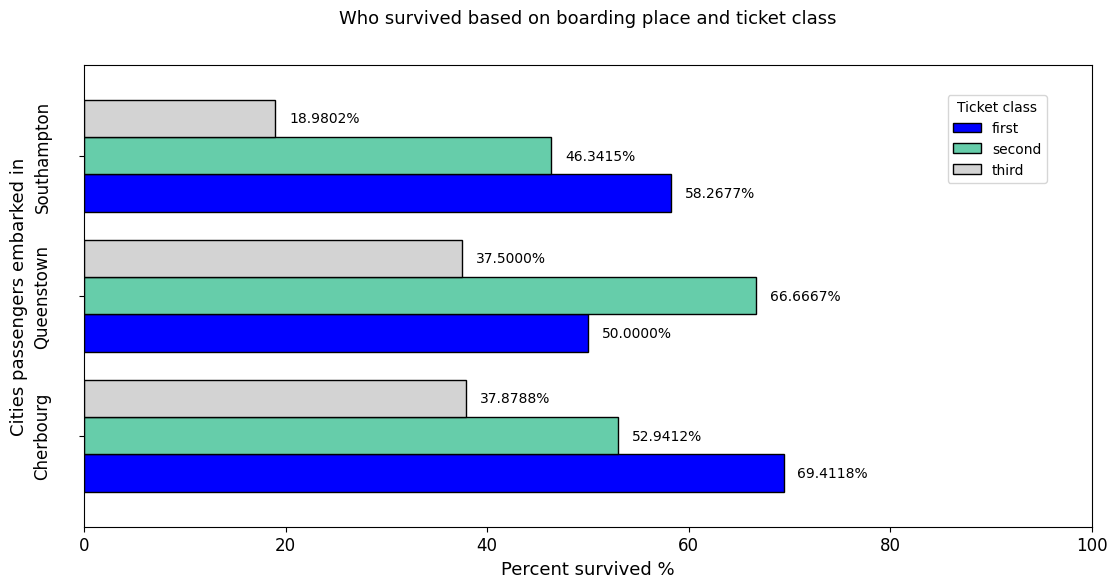

In [ ]:

fig, ax = plt.subplots(figsize=(13, 6)) #Itt beállítjuk az ábra méretét

pivot.plot(kind='barh', stacked=False, color=["b", "mediumaquamarine", "lightgrey"], ax=ax, edgecolor='black', linewidth=1, width=0.8) #Ezzel megcsináljuk magát a barplotot és beállítjuk, hogy az "oszlopok" (amik most fekvő helyzetben vannak) szegélyezve legyenek

#Itt beállítjuk a grafikon adatait

fs = 13 #Ez lesz az egységes betűméret

ax.set_title('Who survived based on boarding place and ticket class', fontsize = fs, pad = 30) #A grafikon címe. A pad paranccsal tesszük messzebb a grafikontól itt is és máshol is

ax.set_yticklabels(pivot.index, rotation=90, va = 'center') #Ezzel forgatjuk függőlegessé az y tengelyen szereplő városneveket

ax.set_xlabel('Percent survived %', fontsize = fs)

ax.set_ylabel('Cities passengers embarked in', fontsize = fs)

ax.tick_params(axis='y', labelsize=12, pad = 20) #Az y-tick-ek méretének beállítása

ax.tick_params(axis='x', labelsize=12)

ax.legend(title='Ticket class',
          labels=["first","second", "third"],
          bbox_to_anchor=(0.85, 0.95),
          loc='upper left', fontsize = 10) #Részben az órai kódból átemelt részlet, annyival kiegészítve, hogy be van benne állítva a magyarázat betűmérete

ax.set_xlim([0,100]) #x-tengely beállítása 0 és 1 közé

for container in ax.containers:
  ax.bar_label(container, label_type="edge", fmt='%.4f%%', fontsize = 10, padding = 10) #A padding paranccsal eltoljuk a barlabel-öket maguktól a bar-októl


#plt.savefig("drive/MyDrive/hf3_Szirmai Vilmos.png") #Ábra mentése



# HTML konvertálás

In [ ]:
# alma # hibára fut, így nem fut le a következő cella a Run all alatt

In [ ]:
  # %%shell
  # jupyter nbconvert --to html adatbanyaszat_2023_tavasz_gyak1.ipynb